In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import

import os
import glob
import copy

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch import optim
from torch.utils.data import Dataset, DataLoader, random_split
from torch.optim.lr_scheduler import ReduceLROnPlateau

from torchvision import transforms, utils
from torchsummary import summary

In [ ]:
# CUDA

device = None

if torch.cuda.is_available() :
    device = torch.device('cuda')
else : 
    device = torch.device('cpu')

print(torch.__version__)
print(device)

1.8.0+cu101
cpu


In [ ]:
path_dir_data = './drive/MyDrive/northpole/data/'
file_list_data = os.listdir(path_dir_data)
print(file_list_data) 

['sample_submission.csv', 'train.csv', 'train']


In [ ]:
path_dir_train = './drive/MyDrive/northpole/data/train'
file_list_train = os.listdir(path_dir_train)
file_list_train.sort()
print(file_list_train)

['197811.npy', '197812.npy', '197901.npy', '197902.npy', '197903.npy', '197904.npy', '197905.npy', '197906.npy', '197907.npy', '197908.npy', '197909.npy', '197910.npy', '197911.npy', '197912.npy', '198001.npy', '198002.npy', '198003.npy', '198004.npy', '198005.npy', '198006.npy', '198007.npy', '198008.npy', '198009.npy', '198010.npy', '198011.npy', '198012.npy', '198101.npy', '198102.npy', '198103.npy', '198104.npy', '198105.npy', '198106.npy', '198107.npy', '198108.npy', '198109.npy', '198110.npy', '198111.npy', '198112.npy', '198201.npy', '198202.npy', '198203.npy', '198204.npy', '198205.npy', '198206.npy', '198207.npy', '198208.npy', '198209.npy', '198210.npy', '198211.npy', '198212.npy', '198301.npy', '198302.npy', '198303.npy', '198304.npy', '198305.npy', '198306.npy', '198307.npy', '198308.npy', '198309.npy', '198310.npy', '198311.npy', '198312.npy', '198401.npy', '198402.npy', '198403.npy', '198404.npy', '198405.npy', '198406.npy', '198407.npy', '198408.npy', '198409.npy', '1984

In [ ]:
train_csv = pd.read_csv('./drive/MyDrive/northpole/data/train.csv')
train_csv

,month,file_nm
0,1978-11,197811.npy
1,1978-12,197812.npy
2,1979-01,197901.npy
3,1979-02,197902.npy
4,1979-03,197903.npy
...,...,...
477,2018-08,201808.npy
478,2018-09,201809.npy
479,2018-10,201810.npy
480,2018-11,201811.npy


In [ ]:
submission_csv = pd.read_csv('./drive/MyDrive/northpole/data/sample_submission.csv')
submission_csv

,month,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,136152,136153,136154,136155,136156,136157,136158,136159,136160,136161,136162,136163,136164,136165,136166,136167,136168,136169,136170,136171,136172,136173,136174,136175,136176,136177,136178,136179,136180,136181,136182,136183,136184,136185,136186,136187,136188,136189,136190,136191
0,2019-01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2019-02,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2019-03,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2019-04,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2019-05,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,2019-06,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,2019-07,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,2019-08,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,2019-09,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,2019-10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


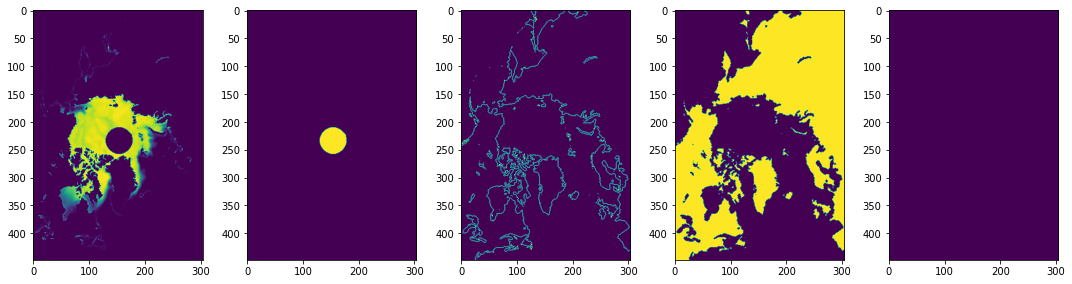

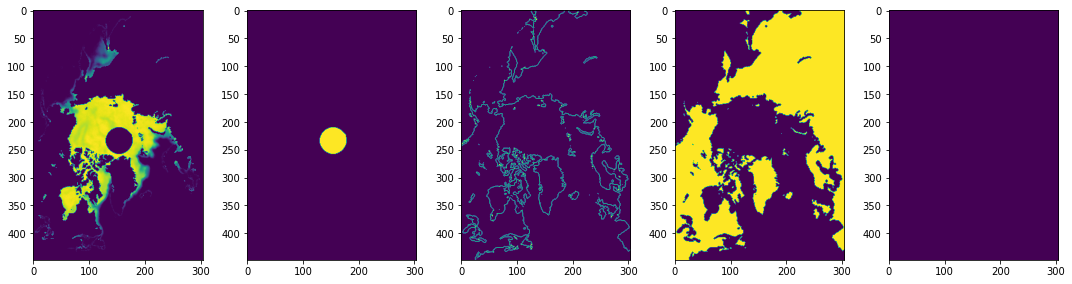

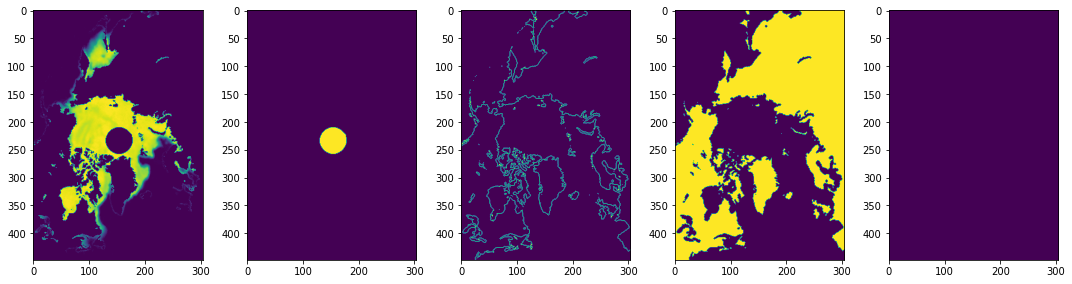

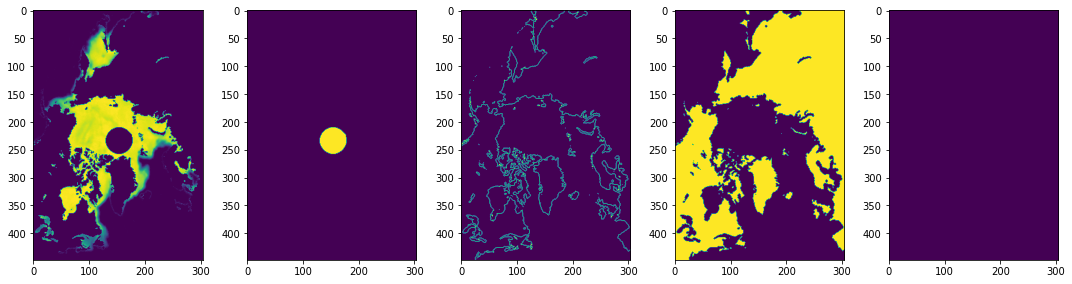

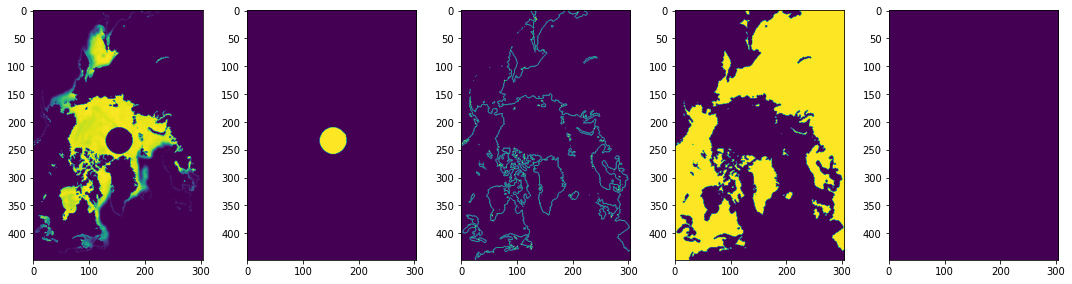

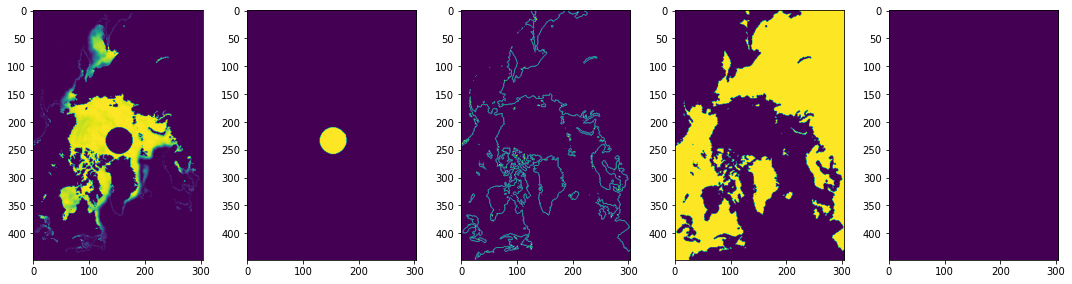

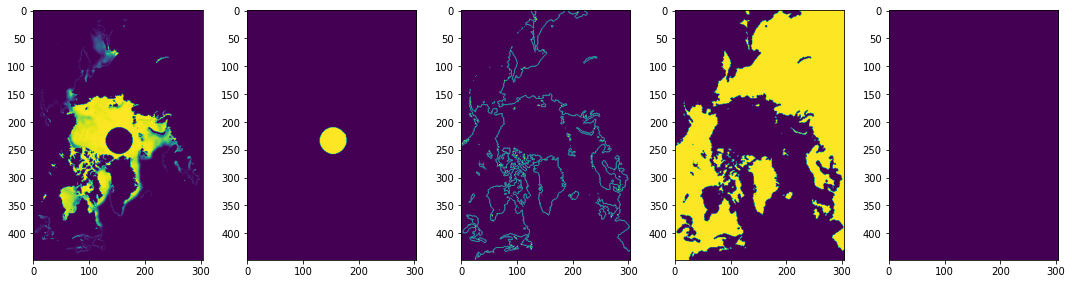

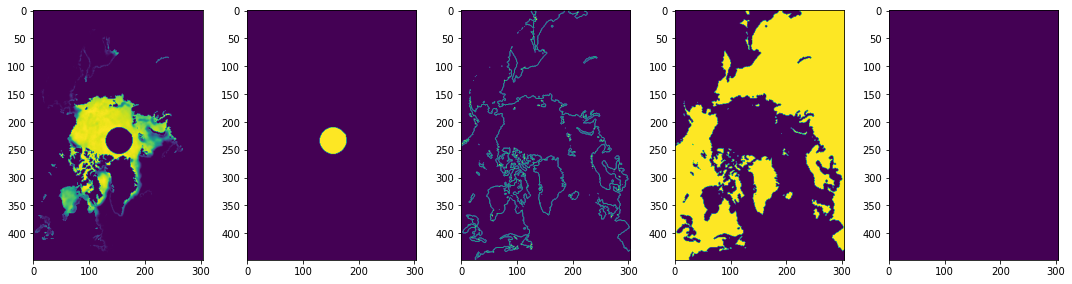

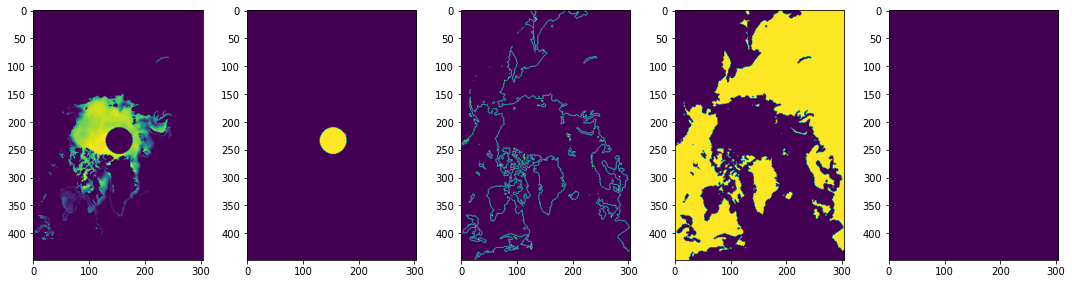

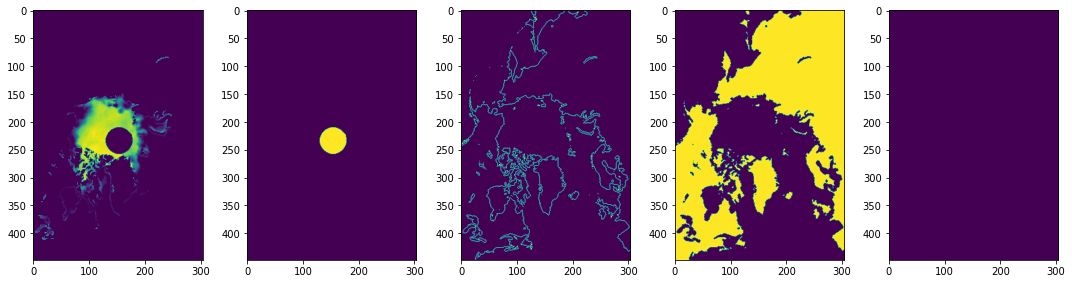

In [ ]:
for i in range(10):
  file_name = train_csv['file_nm'].iloc[i]
  file_npy = np.load(os.path.join('./drive/MyDrive/northpole/data/train', file_name))
  
  num_channel = 5
  plt.figure(figsize = (3*num_channel, 5))
  for ch in range(num_channel):
      img = file_npy[:, :, ch]
      plt.subplot(1, num_channel, ch+1)
      plt.imshow(img)
  plt.tight_layout()
  plt.show()
  plt.close()

In [ ]:
# path_dir_data # data_path
# path_dir_train # train_data_path
# file_list_train # file_list

print(file_list_train)

['197811.npy', '197812.npy', '197901.npy', '197902.npy', '197903.npy', '197904.npy', '197905.npy', '197906.npy', '197907.npy', '197908.npy', '197909.npy', '197910.npy', '197911.npy', '197912.npy', '198001.npy', '198002.npy', '198003.npy', '198004.npy', '198005.npy', '198006.npy', '198007.npy', '198008.npy', '198009.npy', '198010.npy', '198011.npy', '198012.npy', '198101.npy', '198102.npy', '198103.npy', '198104.npy', '198105.npy', '198106.npy', '198107.npy', '198108.npy', '198109.npy', '198110.npy', '198111.npy', '198112.npy', '198201.npy', '198202.npy', '198203.npy', '198204.npy', '198205.npy', '198206.npy', '198207.npy', '198208.npy', '198209.npy', '198210.npy', '198211.npy', '198212.npy', '198301.npy', '198302.npy', '198303.npy', '198304.npy', '198305.npy', '198306.npy', '198307.npy', '198308.npy', '198309.npy', '198310.npy', '198311.npy', '198312.npy', '198401.npy', '198402.npy', '198403.npy', '198404.npy', '198405.npy', '198406.npy', '198407.npy', '198408.npy', '198409.npy', '1984

In [160]:
class NorthpoleDataset(Dataset):
  def __init__(self, data_dir, transform, frame_num = 7, predict_num = 3, stride = 1):
    # 데이터를 10개씩 묶어서 7장을 통해 뒤에꺼 3장을 예측
    
    super(NorthpoleDataset, self).__init__()
    
    file_names = os.listdir(data_dir)
    self.filepaths = [os.path.join(data_dir, i) for i in sorted(file_names)]

    self.transform = transform
    self.frame_num = frame_num
    self.predict_num = predict_num
    self.stride = stride
  
  def __len__(self):
    return len(self.filepaths)

  def __getitem__(self, idx):
    # (7, 1, 448, 304)
    # (3, 1, 448, 304)

    dataset = []

    for i in range(idx, idx + self.frame_num + self.predict_num, self.stride):
      # 해빙농도는 0~250으로 이루어져 있음.
      img_npy = np.load(self.filepaths[i])[:, :, 0] / 250
      img_tensor = self.transform(img_npy)
      dataset.append(img_tensor)
    
    x = torch.stack(dataset[:self.frame_num])
    x = x.transpose(0, 1).to(dtype=torch.float)

    y = torch.stack(dataset[self.frame_num:])
    y = y.transpose(0, 1)
    # channel, frames, height, width

    return x, y

transform = transforms.Compose([transforms.ToTensor()])

north_dataset = NorthpoleDataset(path_dir_train, transform, 7, 3, 1)

print(len(north_dataset))

a, b = north_dataset[1]
print(a.shape, b.shape)

482
torch.Size([1, 7, 448, 304]) torch.Size([1, 3, 448, 304])


In [166]:
# Data를 Train과 Valid로 분리

north_dataset_len = len(north_dataset)
train_len = int(0.8 * len(north_dataset))
val_len = north_dataset_len - train_len

train_dataset,val_dataset = torch.utils.data.random_split(north_dataset, [train_len, val_len])

train_loader = torch.utils.data.DataLoader(train_dataset,
                                           batch_size=12,
                                           shuffle=False)

val_loader = torch.utils.data.DataLoader(val_dataset,
                                         batch_size = 12,
                                         shuffle = False)
print('Len')
print(north_dataset_len)
print(train_len)
print(val_len)

print('-' * 10)
print('Shape')
for a, b in train_dataset:
  print(a.shape, b.shape)
  break

print('-' * 10)

print('Dataloader example')
for a, b in train_loader:
  print(a.shape, b.shape)
  break

Len
482
385
97
----------
Shape
torch.Size([1, 7, 448, 304]) torch.Size([1, 3, 448, 304])
----------
Dataloader example
torch.Size([12, 1, 7, 448, 304]) torch.Size([12, 1, 3, 448, 304])


In [170]:
# 모델 만들기

        # # Encoder
        # self.conv1 = nn.Conv3d(1, 8, 3, padding=1)  
        # self.conv2 = nn.Conv3d(8, 16, 3, padding=1)
        # self.pool = nn.MaxPool3d(3, stride = 2)
       
        # # Decoder
        # self.t_conv1 = nn.ConvTranspose3d(16, 8, 3, stride=2)
        # self.t_conv2 = nn.ConvTranspose3d(8, 1, 3, stride=2)


class NorthAutoencoder(nn.Module):
    def __init__(self):
        super(NorthAutoencoder, self).__init__()
        
        # Encoder
        self.conv1 = nn.Conv3d(1, 8, 3, padding=1)  
        self.conv2 = nn.Conv3d(8, 16, 3, padding=1)
        self.pool = nn.MaxPool3d(3, stride = 2)
       
        # Decoder
        self.t_conv1 = nn.ConvTranspose3d(16, 8, 3, stride=2)
        self.t_conv2 = nn.ConvTranspose3d(8, 1, 3, stride=2)


    def forward(self, x):
        input = x
        x = F.relu(self.conv1(x))
        x = self.pool(x)
        x = F.relu(self.conv2(x))
        x = self.pool(x)
        x = F.relu(self.t_conv1(x))
        x = F.sigmoid(self.t_conv2(x))
        
        ######
        x = F.upsample(x, size=(3, 448, 304))
        
        print(input.shape)
        print(x.shape)
              
        return x

In [171]:
model_1 = NorthAutoencoder()
print(model_1)

NorthAutoencoder(
  (conv1): Conv3d(1, 8, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
  (conv2): Conv3d(8, 16, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
  (pool): MaxPool3d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (t_conv1): ConvTranspose3d(16, 8, kernel_size=(3, 3, 3), stride=(2, 2, 2))
  (t_conv2): ConvTranspose3d(8, 1, kernel_size=(3, 3, 3), stride=(2, 2, 2))
)


In [172]:
summary(model_1, input_size=(1, 7, 448, 304), device=device.type)

# (1, 448, 304)
# input_size = (1, 7, 448, 304)

torch.Size([2, 1, 7, 448, 304])
torch.Size([2, 1, 3, 448, 304])
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv3d-1       [-1, 8, 7, 448, 304]             224
         MaxPool3d-2       [-1, 8, 3, 223, 151]               0
            Conv3d-3      [-1, 16, 3, 223, 151]           3,472
         MaxPool3d-4       [-1, 16, 1, 111, 75]               0
   ConvTranspose3d-5       [-1, 8, 3, 223, 151]           3,464
   ConvTranspose3d-6       [-1, 1, 7, 447, 303]             217
Total params: 7,377
Trainable params: 7,377
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 3.64
Forward/backward pass size (MB): 91.10
Params size (MB): 0.03
Estimated Total Size (MB): 94.76
----------------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1709: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3325: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")


In [173]:
# Dacon에서 제시한 산식 코드

# Loss Function && etric Function

# metrics
def mae_score(true, pred):
    true, pred = numpy_to_tensor(true, pred)
    score = np.mean(np.abs(true-pred))
    
    return score

# metrics
def f1_score(true, pred):
    true, pred = numpy_to_tensor(true, pred)

    target = np.where((1*0.05 < true)&(true < 1*0.5))
    # target = np.where((true>1*0.05)<1*0.5))
     
    true = true[target]
    pred = pred[target]
    true = np.where(true < 1*0.15, 0, 1)
    pred = np.where(pred < 1*0.15, 0, 1)
    
    right = np.sum(true * pred == 1)
    precision = right / np.sum(true+1e-8)
    recall = right / np.sum(pred+1e-8)
    score = 2 * precision*recall/(precision+recall+1e-8)
    
    return score
    
# loss function
def mae_over_f1(true, pred):
    mae = mae_score(true, pred)
    f1 = f1_score(true, pred)
    score = mae/(f1+1e-8)
    
    return score

def numpy_to_tensor(true, pred):
    return true.cpu().detach().numpy(), pred.cpu().detach().numpy()

In [174]:
# Revise

opt_adam = optim.Adam(model_1.parameters(), lr=3e-4)

def get_lr(opt):
    for param_group in opt.param_groups:
        return param_group["lr"]

# check our learning rate
current_lr = get_lr(opt_adam)
print(f"current_lr = {current_lr}")

# learning rate scheduler
lr_scheduler = ReduceLROnPlateau(opt_adam, mode="min", factor=0.5, patience=20, verbose=1)

# example 
for i in range(100):
    lr_scheduler.step(1)

current_lr = 0.0003
Epoch    22: reducing learning rate of group 0 to 1.5000e-04.
Epoch    43: reducing learning rate of group 0 to 7.5000e-05.
Epoch    64: reducing learning rate of group 0 to 3.7500e-05.
Epoch    85: reducing learning rate of group 0 to 1.8750e-05.


In [175]:
def metrics_batch(pred, true, metrics):
    # if needed add param "metrics" to custom
    """
    output will be pred
    target will be corrects
    """
    if metrics:
        return list(map(lambda x: x(true, pred), metrics))
    mae_score = mae_score(true, pred)
    f1_score = f1_score(true, pred)
    return (mae_score, f1_score)

def loss_batch(loss_func, pred, true, opt=None):
    """
    loss_func => mae_over_f1
    """
    loss = loss_func(true, pred)
    with torch.no_grad():
        metrics = metrics_batch(pred, true, [mae_score, f1_score])
    if opt is not None:
        opt.zero_grad()
        # loss.backward()
        opt.step()  # 학습이 이뤄지는 곳
    return loss, metrics

In [176]:
def loss_epoch(model, loss_func, dataset_dataloader, sanity_check=False, opt=None):
    running_loss = 0.0
    running_metric = [0.0, 0.0]
    len_data = len(dataset_dataloader.dataset)

    for x, y in dataset_dataloader:
        x = x.to(device)
        y = y.to(device)
        # 모델 결과
        pred = model(x)
        # 손실함수 구하기
        loss, metrics = loss_batch(loss_func, pred, y, opt)
        # 손실함수 
        running_loss += loss
        if metrics is not None:
            for idx, metric_value in enumerate(metrics):
                running_metric[idx] += metric_value
        
        # 문제 있으면 break, 여기서는 True 일때 바로 break
        if sanity_check is True:
            break
    
    loss = running_loss / float(len_data)
    metrics = list(map(lambda x: x/float(len_data), metrics))
    print(loss, metrics)
    return loss, metrics

In [177]:
loss_func = mae_over_f1
opt_adam = optim.Adam(model_1.parameters(), lr=3e-4)
lr_scheduler = ReduceLROnPlateau(opt_adam, mode="min", factor=0.5, patience=20, verbose=1)

TRAIN_PARAMS = {
    "num_epochs" : 10,
    "loss_func" : loss_func,
    "optimizer" : opt_adam,
    "train_dataloader" : train_loader,
    "valid_dataloader" : val_loader,
    "sanity_check" : True,
    "lr_scheduler" : lr_scheduler,
    "save_path" : "./weights.pt"
}

In [178]:
def train(model, params):
    num_epochs = params['num_epochs']
    loss_func = params['loss_func']
    opt = params["optimizer"]
    train_dataloader = params['train_dataloader']
    valid_dataloader = params['valid_dataloader']
    sanity_check = params['sanity_check']
    lr_scheduler = params['lr_scheduler']
    save_path = params['save_path']

    # keep history of the loss and metric
    loss_hist = {
        "train" : [],
        "valid" : []
    }

    metrics_hist = {
        "train" : [],
        "valid" : []
    }

    # copy best weights
    best_model_weights = copy.deepcopy(model.state_dict())
    # init best loss
    best_loss = float("inf")

    for epoch in range(num_epochs):
        current_lr = get_lr(opt)
        print(f'Epoch:{epoch}/{num_epochs-1}, current lr:{current_lr}')
        model.train()
        train_loss, train_metrics = loss_epoch(model, loss_func, train_dataloader, sanity_check, opt)

        # save history
        loss_hist["train"].append(train_loss)
        metrics_hist["train"].append(train_metrics)

        # model.eval()
        # with torch.no_grad():
    

    return model, loss_hist, metrics_hist

In [179]:
model_1, loss_hist, metrics_hist = train(model_1, TRAIN_PARAMS)

print(loss_hist)

Epoch:0/9, current lr:0.0003


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1709: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3325: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")


torch.Size([12, 1, 7, 448, 304])
torch.Size([12, 1, 3, 448, 304])
0.0018208037641187134 [0.0013116526408388758, 0.0018710912158951055]
Epoch:1/9, current lr:0.0003
torch.Size([12, 1, 7, 448, 304])
torch.Size([12, 1, 3, 448, 304])
0.0018208037641187134 [0.0013116526408388758, 0.0018710912158951055]
Epoch:2/9, current lr:0.0003
torch.Size([12, 1, 7, 448, 304])
torch.Size([12, 1, 3, 448, 304])
0.0018208037641187134 [0.0013116526408388758, 0.0018710912158951055]
Epoch:3/9, current lr:0.0003
torch.Size([12, 1, 7, 448, 304])
torch.Size([12, 1, 3, 448, 304])
0.0018208037641187134 [0.0013116526408388758, 0.0018710912158951055]
Epoch:4/9, current lr:0.0003
torch.Size([12, 1, 7, 448, 304])
torch.Size([12, 1, 3, 448, 304])
0.0018208037641187134 [0.0013116526408388758, 0.0018710912158951055]
Epoch:5/9, current lr:0.0003
torch.Size([12, 1, 7, 448, 304])
torch.Size([12, 1, 3, 448, 304])
0.0018208037641187134 [0.0013116526408388758, 0.0018710912158951055]
Epoch:6/9, current lr:0.0003
torch.Size([12, 

### Dummy Code

In [ ]:
# 모델 만들기

class ConvAutoencoder(nn.Module):
    def __init__(self):
        super(ConvAutoencoder, self).__init__()
       
        #Encoder
        self.conv1 = nn.Conv2d(1, 10, 3, padding=1)  
        self.conv2 = nn.Conv2d(10, 20, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
       
        #Decoder
        self.t_conv1 = nn.ConvTranspose2d(20, 10, 2, stride=2)
        self.t_conv2 = nn.ConvTranspose2d(10, 1, 2, stride=2)


    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool(x)
        x = F.relu(self.conv2(x))
        x = self.pool(x)
        x = F.relu(self.t_conv1(x))
        x = F.sigmoid(self.t_conv2(x))
              
        return x


#Instantiate the model
model = ConvAutoencoder()
print(model)

In [ ]:
my_model3 = ConvAutoencoder()
print(my_model3)

### Dummy 2

In [ ]:
# Model 만들기
# Autoencoder, Encoder - Decoder 모델

# shape 7, 1, 448, 304
# batch, channel, height, width
# nn.Conv3d 1 8
# nn.Conv3d 8 16
# nn.ConvTranspose3d 16 1

    # shape 7 1 448 304
    # input_frames, input_channel, input_height, input_width

    # input_channel, init_filters
    # init_filters, init_filters * 2
    # init_filters * 2, 1

    # encoder_input / filters, kernel_size, strides, padding

    # nn.Conv2d(in_channels, out_channels, kernel_size, stride=1, 
    # padding=0, dilation=1, groups=1, bias=True)

class Autoencoder(nn.Module):
  def __init__(self):
    super(Autoencoder, self).__init__()

    # shape 7 1 448 304
    # input_frames, input_channel, input_height, input_width   

    # f, c, h, w = 7, 1, 448, 304

    self.encoder = nn.Sequential(
        nn.Conv2d(1, 10, kernel_size=3, padding=1)(encoder_input),
        nn.ReLU(True),
        # nn.MaxPool2d(2, stride=2),  # b, 16, 5, 5
        nn.Conv2d(10, 20, kernel_size=3, padding=1),  # b, 8, 3, 3
        # nn.ReLU(True),
        # nn.MaxPool2d(2, stride=1)  # b, 8, 2, 2
      )
    
    self.decoder = nn.Sequential(
        nn.ConvTranspose2d(20, 10, kernel_size=3, padding=1),  # b, 16, 5, 5
        nn.ReLU(True),
        nn.ConvTranspose2d(10, 1, kernel_size=3, padding=1),  # b, 8, 15, 15
        # nn.ReLU(True),
        # nn.ConvTranspose2d(8, 1, 2, stride=2, padding=1),  # b, 1, 28, 28
        nn.Tanh()
      )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        # 추가
        x = F.upsample(x, size=(3, 448, 304))
        # print(input.shape)
        print(x.shape)
        return x

In [ ]:
my_model = Autoencoder().to(device)
print(my_model)

In [ ]:
summary(my_model3, input_size=(1, 448, 304), device=device.type)

In [ ]:
# summary(my_model, input_size=(1, 448, 304), device=device.type)

In [ ]:
# autoencoder = Autoencoder()
# optimizer = torch.optim.Adam(autoencoder.parameters(), lr=0.005)
# criterion = nn.MSELoss()